In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import make_blobs

In [2]:
X, y = make_blobs(n_samples=200, centers=3, n_features=3, cluster_std=3.5, random_state=0)

In [3]:
df1 = pd.DataFrame(X, columns=["x", "y","z"])
df2 = pd.DataFrame(y, columns=["label"])
df = pd.concat([df1, df2], axis=1)

In [4]:
df.head()

,x,y,z,label
0,-1.337595,0.173119,2.747017,0
1,4.342074,-5.584126,1.390002,1
2,0.165076,4.195360,13.660102,2
3,-3.971512,-1.399995,0.067463,1
4,-3.401832,7.542165,-1.111484,0


Text(0, 0.5, 'z')

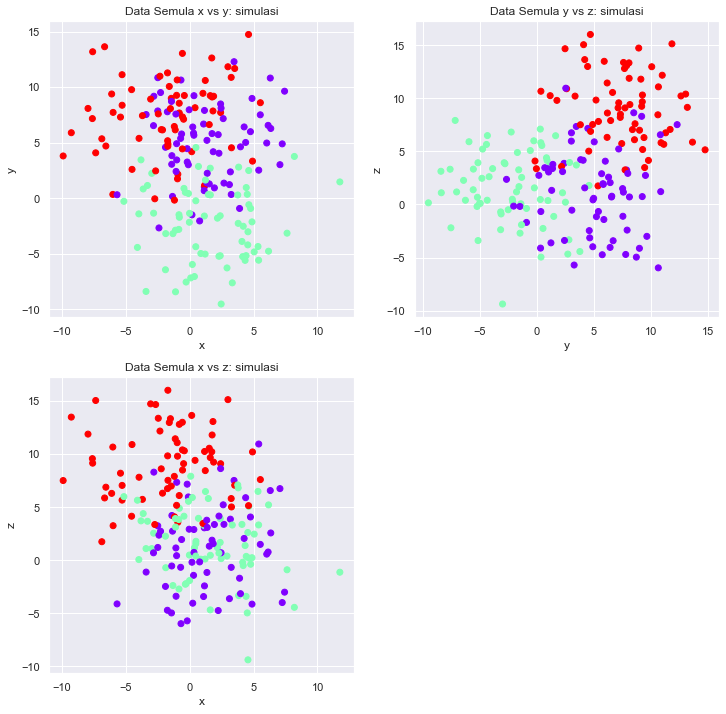

In [5]:
plt.figure(figsize=(12, 12))  
plt.subplot(2, 2, 1) 
plt.scatter(X[:,0], X[:,1],c=y,cmap='rainbow')
plt.title('Data Semula x vs y: simulasi')
plt.xlabel('x')
plt.ylabel('y')
plt.subplot(2, 2, 2) 
plt.scatter(X[:,1], X[:,2],c=y,cmap='rainbow')
plt.title('Data Semula y vs z: simulasi')
plt.xlabel('y')
plt.ylabel('z')
plt.subplot(2, 2, 3) 
plt.scatter(X[:,0], X[:,2],c=y,cmap='rainbow')
plt.title('Data Semula x vs z: simulasi')
plt.xlabel('x')
plt.ylabel('z')

In [6]:
kmeans = KMeans(3, random_state=123)
kmeans.fit(df1)

KMeans(n_clusters=3, random_state=123)

In [7]:
clusters = df.copy()
clusters['cluster_pred']=kmeans.fit_predict(df1)
clusters.head()

,x,y,z,label,cluster_pred
0,-1.337595,0.173119,2.747017,0,2
1,4.342074,-5.584126,1.390002,1,2
2,0.165076,4.195360,13.660102,2,1
3,-3.971512,-1.399995,0.067463,1,2
4,-3.401832,7.542165,-1.111484,0,0


Diisi dg kata-kata $\int x^2 dx$

Text(0, 0.5, 'z')

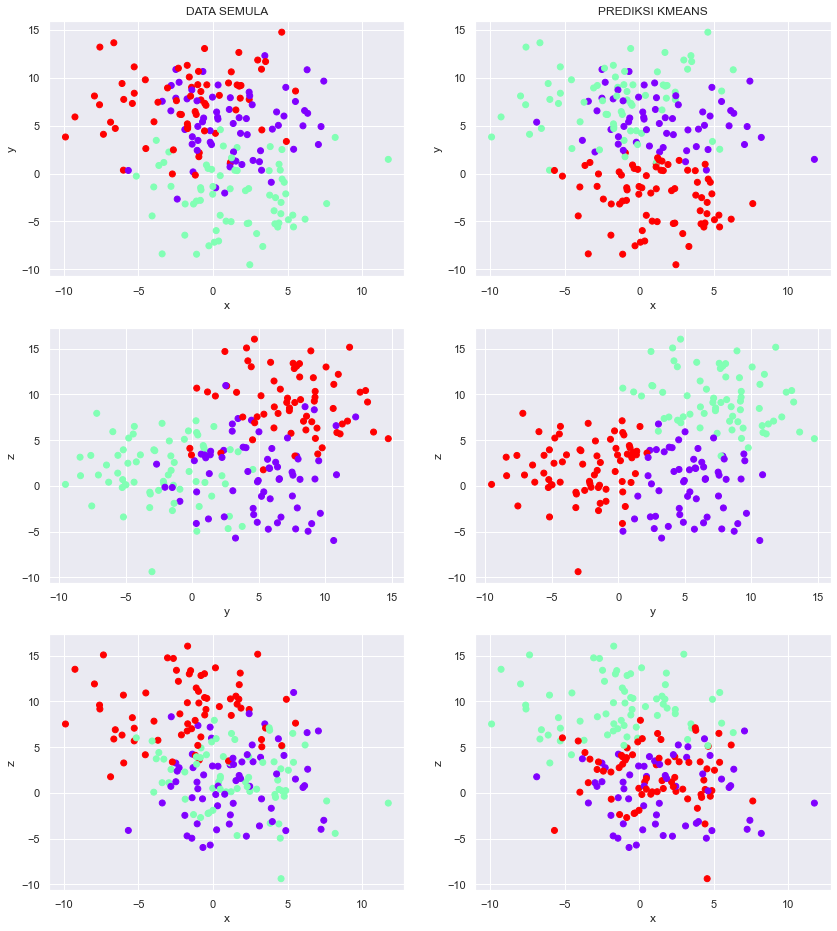

In [8]:
plt.figure(figsize=(14, 16))  
plt.subplot(3, 2, 1)  
plt.scatter(clusters['x'],clusters['y'],c=clusters['label'],cmap='rainbow')
plt.xlabel('x')
plt.ylabel('y')
plt.title('DATA SEMULA')
plt.subplot(3, 2, 2)  
plt.scatter(clusters['x'],clusters['y'],c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel('x')
plt.ylabel('y')
plt.title('PREDIKSI KMEANS')
plt.subplot(3, 2, 3)  
plt.scatter(clusters['y'],clusters['z'],c=clusters['label'],cmap='rainbow')
plt.xlabel('y')
plt.ylabel('z')
plt.subplot(3, 2, 4)  
plt.scatter(clusters['y'],clusters['z'],c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel('y')
plt.ylabel('z')
plt.subplot(3, 2, 5)  
plt.scatter(clusters['x'],clusters['z'],c=clusters['label'],cmap='rainbow')
plt.xlabel('x')
plt.ylabel('z')
plt.subplot(3, 2, 6)  
plt.scatter(clusters['x'],clusters['z'],c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel('x')
plt.ylabel('z')

In [9]:
df_analysis = clusters.drop("label", axis=1)
df_analysis.head()

,x,y,z,cluster_pred
0,-1.337595,0.173119,2.747017,2
1,4.342074,-5.584126,1.390002,2
2,0.165076,4.195360,13.660102,1
3,-3.971512,-1.399995,0.067463,2
4,-3.401832,7.542165,-1.111484,0


In [10]:
cluster_analysis = df_analysis.groupby('cluster_pred').count().round(3)
cluster_analysis

,x,y,z
cluster_pred,,,
0,59,59,59
1,68,68,68
2,73,73,73


In [11]:
original_cluster = df.groupby('label').count().round(3)
original_cluster

,x,y,z
label,,,
0,67,67,67
1,67,67,67
2,66,66,66


In [12]:
grouped = df_analysis.groupby('cluster_pred')
agg_result = grouped.agg(
    {
        'x': [('Mean', 'mean'), ('Count', 'count')],
        'y': [('Mean', 'mean'), ('Count', 'count')],
        'z': [('Mean', 'mean'), ('Count', 'count')]
    }
)


agg_result

x               y               z      
                  Mean Count      Mean Count      Mean Count
cluster_pred                                                
0             1.585346    59  5.533667    59  0.084788    59
1            -1.398023    68  7.637926    68  9.377345    68
2             1.093773    73 -2.445601    73  1.943079    73

In [13]:
grouped1 = df.groupby('label')
agg_result1 = grouped1.agg(
    {
        'x': [('Mean', 'mean'), ('Count', 'count')],
        'y': [('Mean', 'mean'), ('Count', 'count')],
        'z': [('Mean', 'mean'), ('Count', 'count')]
    }
)


agg_result1

x               y               z      
           Mean Count      Mean Count      Mean Count
label                                                
0      1.330972    67  5.001420    67  1.219822    67
1      1.568839    67 -2.301029    67  1.587057    67
2     -1.757152    66  7.369853    66  9.037057    66

In [14]:
wcss =[]

for i in range(1,10):
    kmeans = KMeans(i, random_state=123)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
wcss

[13344.33580804183,
 7832.394008624874,
 5844.575673206046,
 5078.8674477611075,
 4431.158260027612,
 3944.7870487535197,
 3566.9367519030898,
 3188.0154589060785,
 2927.3647163766223]

Text(0, 0.5, 'WCSS')

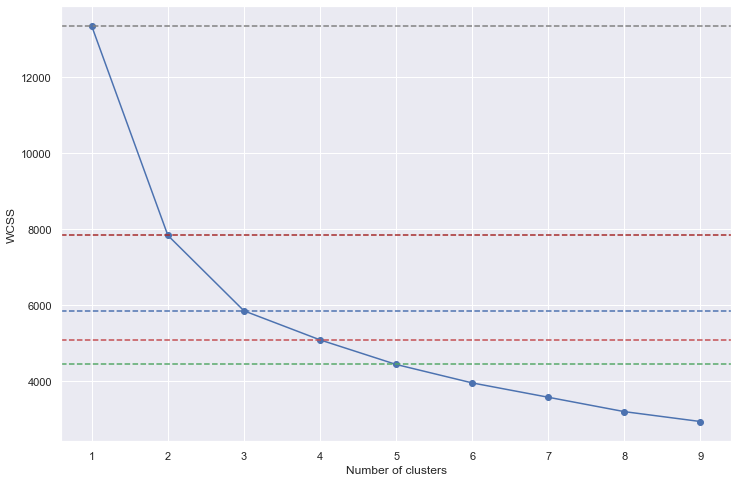

In [15]:
plt.figure(figsize=(12, 8)) 
plt.plot(range(1,10),wcss,marker='o', linestyle='-')
plt.axhline(y=wcss[0], color='gray', linestyle='--')
plt.axhline(y=wcss[1], color='brown', linestyle='--')
plt.axhline(y=wcss[2], color='b', linestyle='--')
plt.axhline(y=wcss[3], color='r', linestyle='--')
plt.axhline(y=wcss[4], color='g', linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')